In [1]:
import os
import sys
import random
import time
from random import seed, randint
import argparse
import platform
from datetime import datetime
import imp
import numpy as np
import fileinput
from itertools import product
import pandas as pd
from scipy.interpolate import griddata
from scipy.interpolate import interp2d
import seaborn as sns
from os import listdir

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import griddata
import matplotlib as mpl
sys.path.insert(0,'..')
from notebookFunctions import *
# from .. import notebookFunctions

%matplotlib inline
plt.rcParams['figure.figsize'] = (10,6.180)    #golden ratio
# %matplotlib notebook
%load_ext autoreload
%autoreload 2

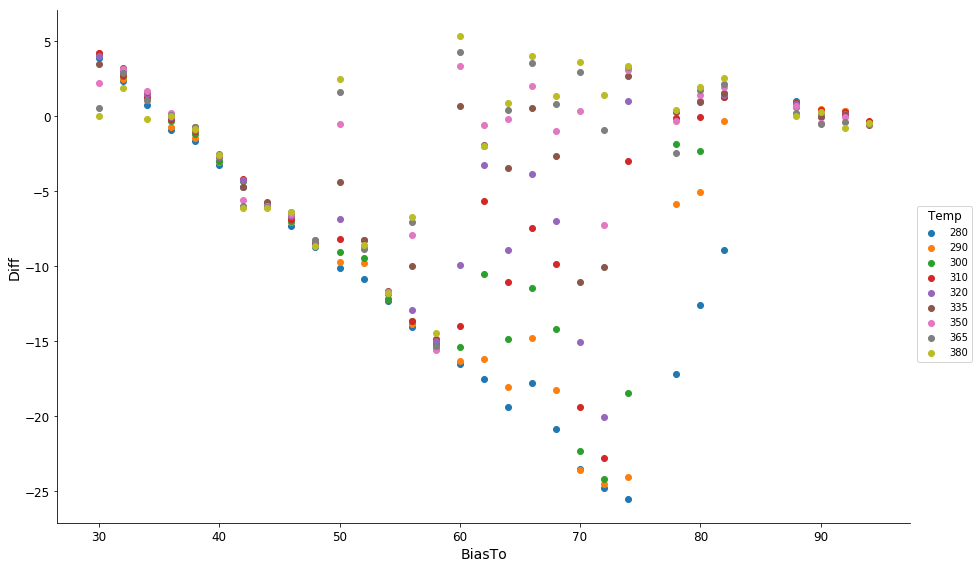

In [20]:
data = pd.read_feather("/Users/weilu/Research/server/apr_2018/first/force_0.04_rg_0.15_lipid_1.0_mem_1_go_0.8/rerun_3_14_Apr_223723.feather")
dic = {"T0":280, "T1":290, "T2":300, "T3":310, "T4":320, "T5":335, "T6":350, "T7":365, "T8":380, "T9":410, "T10":440, "T11":470}
a = data
a["Temp"] = a["Temp"].apply(lambda x: dic[x])
rerun3 = data
t = a.query("Temp < 400").groupby(["BiasTo","Temp"])[["DisReal","Run"]].mean().reset_index()
t["Diff"] = t["DisReal"]-t["BiasTo"].apply(pd.to_numeric)
t["BiasTo"] = t["BiasTo"].apply(pd.to_numeric)
fg = sns.FacetGrid(data=t, hue='Temp', size=8, aspect=1.61)
fg.map(plt.scatter, 'BiasTo', 'Diff').add_legend()

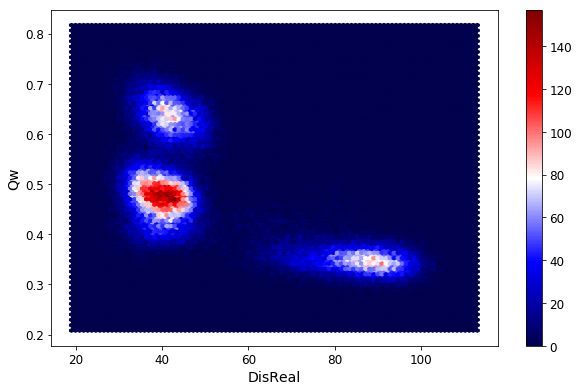

In [21]:
rerun3.query("Temp == 300").plot.hexbin("DisReal", "Qw", cmap="seismic", sharex=False)

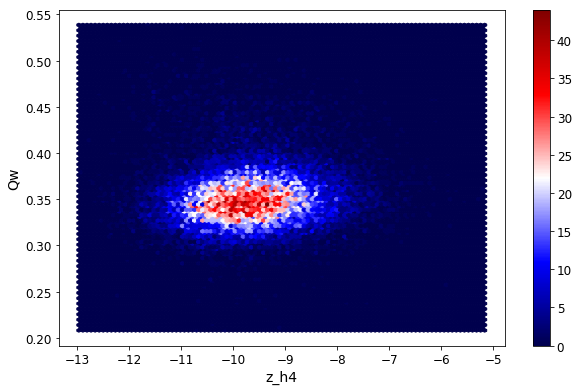

In [31]:
rerun3.query("Temp == 300 and DisReal > 60").plot.hexbin("z_h4", "Qw", cmap="seismic", sharex=False)

In [33]:
rerun3.query("Temp == 300 and DisReal > 60").groupby(["BiasTo", "Run"])["DisReal"].describe().query("count > 100")

count       mean       std        min        25%        50%  \
BiasTo Run                                                                
62.0   0    146.0  66.968664  4.251010  60.113708  63.551231  66.606636   
       2    177.0  67.608288  4.627580  60.235955  63.992350  66.963768   
       4    137.0  67.713054  4.398218  60.337681  63.838393  67.677220   
       6    166.0  67.464605  4.063150  60.064038  64.491865  66.936016   
       9    125.0  67.197755  3.901446  60.169968  63.804661  67.452696   
64.0   2    126.0  68.148213  4.613862  60.329405  64.788670  67.416978   
66.0   2    137.0  71.142281  4.574288  60.300578  67.976507  71.212010   
       3    131.0  70.205899  4.554043  60.290687  66.719348  70.440070   
       4    254.0  70.540702  4.868250  60.211647  67.044550  70.574882   
       6    118.0  70.291787  4.981881  60.389278  66.673285  69.617507   
       10   111.0  71.662359  4.939355  61.113420  68.607585  71.608816   
68.0   1    187.0  71.388895  4.861836  60.608225  68.340525  71.222061   
       2    155.0  71.197003  4.967379  60.055315  67.683149  71.451362   
       8    174.0  72.024392  4.836195  60.514872  68.430276  72.124338   
       10   217.0  72.525497  5.115302  60.443018  69.360998  72.269564   
70.0   1    228.0  74.179577  5.075651  60.726127  70.718757  73.905631   
72.0   3    154.0  75.209491  5.206026  60.273131  71.797320  74.556271   
74.0   4    102.0  77.394440  4.852394  65.627227  73.994701  77.360953   
       5    142.0  76.892100  5.612388  63.801917  72.985977  76.585400   
78.0   0    352.0  80.653193  5.016862  61.429609  77.130908  80.694027   
       1    364.0  80.592283  5.363517  66.216290  76.814878  80.622798   
       2    298.0  80.372376  5.159290  65.954860  77.308042  80.479304   
       4    348.0  80.743318  4.842763  66.917740  77.501314  80.483094   
       8    394.0  80.795320  4.994288  68.405300  77.108565  81.014692   
       9    396.0  80.283517  4.762296  66.628681  77.323240  80.670088   
80.0   0    251.0  82.308891  5.071606  68.605102  78.841793  82.872029   
       1    154.0  83.341818  5.218937  70.648222  79.113241  84.332590   
       2    325.0  82.067939  5.083707  69.085630  78.406958  81.918390   
       3    200.0  82.283511  4.954627  69.778699  78.997536  82.149502   
       4    283.0  82.654437  5.215333  67.547192  79.143987  82.390454   
...           ...        ...       ...        ...        ...        ...   
88.0   4    409.0  89.196418  4.913713  77.484841  86.086149  89.132777   
       5    180.0  87.851766  5.142330  74.265093  85.001724  87.770288   
       6    286.0  89.041329  4.689109  76.269267  85.514675  89.392071   
       7    275.0  88.708653  4.988103  75.675599  85.263066  88.938783   
       8    351.0  89.127832  4.711677  75.942557  85.956780  88.847210   
       9    294.0  89.392496  4.832580  76.422384  86.080439  89.549086   
90.0   0    318.0  90.225278  4.675927  77.125490  87.117632  90.368759   
       1    410.0  90.581655  4.890845  75.763086  87.625426  90.723992   
       2    148.0  85.877721  5.088191  74.103878  82.224037  85.345169   
       5    344.0  90.878114  4.672235  76.084728  87.830672  90.616955   
       6    283.0  91.258381  4.853701  75.348297  88.023521  91.627360   
       8    371.0  90.634701  4.731549  75.759561  87.468837  90.815302   
       9    276.0  90.610374  4.687839  76.232256  87.239940  90.470330   
       10   350.0  90.525571  4.863214  70.785685  87.693109  90.693885   
92.0   1    291.0  92.439933  4.553441  80.813564  89.183908  92.542190   
       2    296.0  91.656533  5.038083  77.361723  88.277115  91.768049   
       4    336.0  92.724707  4.840905  78.063804  89.373032  93.048935   
       5    250.0  91.861516  5.035955  79.862779  88.420323  91.759165   
       6    363.0  92.083965  4.881342  74.306149  88.935052  91.910368   
       7    339.0  92.450575  4.469519  81.514382  89.638700  92.391236   
       9    247.0  92.917690  4.61095

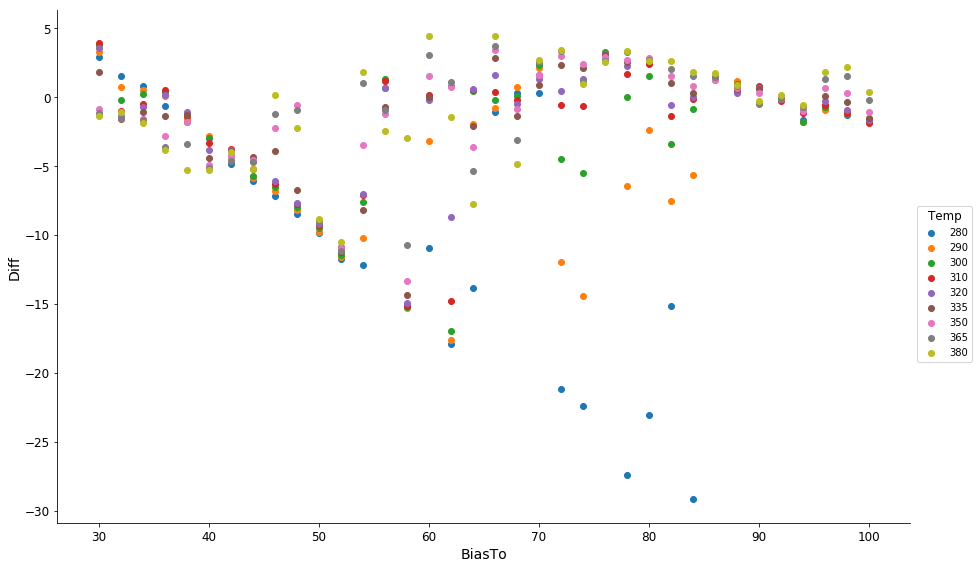

In [2]:
data = pd.read_feather("/Users/weilu/Research/server/apr_2018/first/force_0.04_rg_0.15_lipid_1.0_mem_1_go_0.8/rerun_1_08_Apr_145204.feather")
dic = {"T0":280, "T1":290, "T2":300, "T3":310, "T4":320, "T5":335, "T6":350, "T7":365, "T8":380, "T9":410, "T10":440, "T11":470}
a = data
a["Temp"] = a["Temp"].apply(lambda x: dic[x])
rerun1 = data
t = a.query("Temp < 400").groupby(["BiasTo","Temp"])[["DisReal","Run"]].mean().reset_index()
t["Diff"] = t["DisReal"]-t["BiasTo"].apply(pd.to_numeric)
t["BiasTo"] = t["BiasTo"].apply(pd.to_numeric)
fg = sns.FacetGrid(data=t, hue='Temp', size=8, aspect=1.61)
fg.map(plt.scatter, 'BiasTo', 'Diff').add_legend()

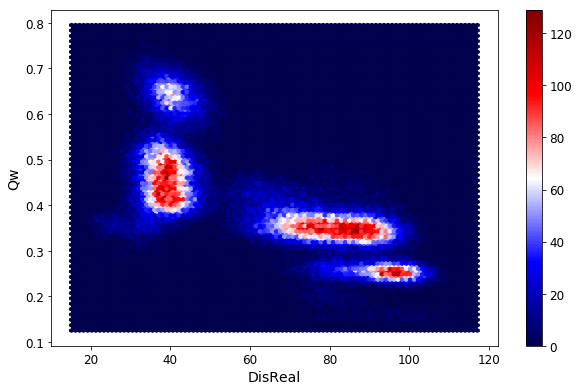

In [3]:
rerun1.query("Temp == 300").plot.hexbin("DisReal", "Qw", cmap="seismic", sharex=False)

In [6]:
t = rerun1.query("Temp == 300 and z_h6 < -10")
t.groupby(["BiasTo", "Run"])["Qw"].describe().query("count > 100")

count      mean       std       min       25%       50%       75%  \
BiasTo Run                                                                      
34.0   10   104.0  0.299061  0.027031  0.228261  0.280666  0.299845  0.320789   
78.0   4    425.0  0.418165  0.055017  0.221956  0.398243  0.421776  0.450579   
84.0   1    122.0  0.260129  0.023644  0.206328  0.243301  0.257075  0.278349   
       8    299.0  0.354539  0.047417  0.141941  0.336897  0.363604  0.382308   
88.0   5    186.0  0.410266  0.052932  0.239977  0.374460  0.412386  0.451472   
94.0   5    144.0  0.321190  0.040749  0.229203  0.291192  0.325123  0.352548   
       10   748.0  0.416885  0.045697  0.130434  0.395152  0.420566  0.443739   
96.0   3    144.0  0.278070  0.021726  0.223663  0.264268  0.281809  0.295832   

                 max  
BiasTo Run            
34.0   10   0.362803  
78.0   4    0.536484  
84.0   1    0.318792  
       8    0.451259  
88.0   5    0.528479  
94.0   5    0.407185  
       10   0.517861  
96.0   3    0.321482

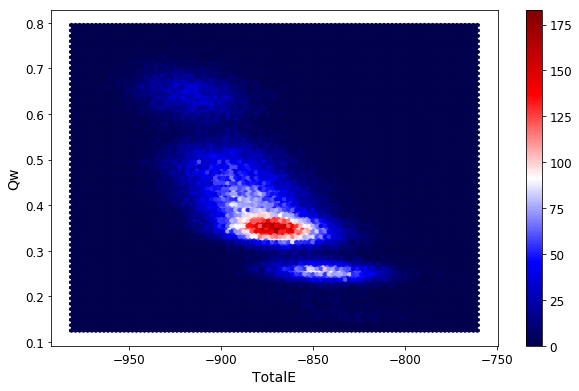

In [10]:
rerun1.query("Temp == 300").plot.hexbin("TotalE", "Qw", cmap="seismic", sharex=False)

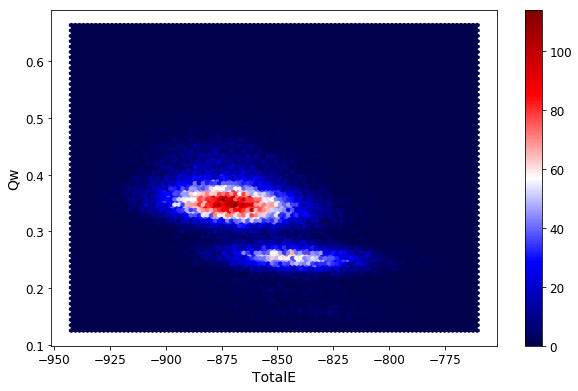

In [11]:
rerun1.query("Temp == 300 and DisReal > 55").plot.hexbin("TotalE", "Qw", cmap="seismic", sharex=False)

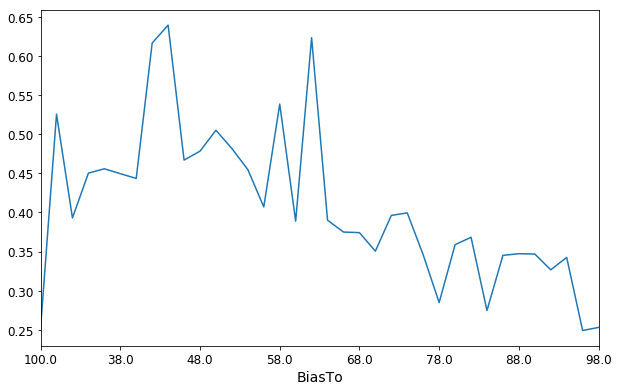

In [15]:
rerun1.query("Temp == 300").groupby("BiasTo")["Qw"].mean().plot()

In [16]:
rerun1.query("Temp == 300").groupby(["BiasTo", "Run"])["Qw"].describe().query("count > 100")

count      mean       std       min       25%       50%       75%  \
BiasTo Run                                                                      
100.0  0    285.0  0.252310  0.013594  0.218101  0.242759  0.252471  0.262069   
       1    275.0  0.253621  0.014092  0.214996  0.244424  0.253357  0.263020   
       2    284.0  0.250760  0.013544  0.210096  0.242933  0.250571  0.259753   
       3    208.0  0.252820  0.013914  0.216940  0.243817  0.252109  0.262207   
       5    186.0  0.252458  0.014377  0.213083  0.242945  0.251629  0.262109   
       6    364.0  0.253775  0.013180  0.214535  0.244184  0.254126  0.261545   
       7    297.0  0.252069  0.014095  0.213421  0.242711  0.251906  0.261171   
       8    377.0  0.254195  0.013122  0.218619  0.245298  0.253742  0.262913   
       11   212.0  0.250402  0.014868  0.217392  0.239599  0.250239  0.261103   
30.0   0    999.0  0.491876  0.030896  0.404090  0.468340  0.491282  0.514951   
       1    308.0  0.662746  0.039205  0.536798  0.636744  0.663804  0.690744   
       5    204.0  0.414557  0.022634  0.355543  0.400022  0.412542  0.431249   
       8    430.0  0.523371  0.028675  0.438212  0.505067  0.521467  0.543366   
       9    210.0  0.412466  0.024613  0.343276  0.395114  0.411317  0.429936   
       10   323.0  0.658309  0.042861  0.553051  0.630105  0.659583  0.686146   
32.0   0    447.0  0.423236  0.034670  0.354334  0.400071  0.416824  0.439101   
       2    436.0  0.444442  0.023112  0.377681  0.429217  0.444261  0.460184   
       3    272.0  0.357363  0.018509  0.305017  0.344791  0.356908  0.369721   
       6    183.0  0.384748  0.032890  0.321086  0.358443  0.380713  0.409861   
       7    489.0  0.398490  0.030577  0.294052  0.377101  0.400133  0.419315   
       8    198.0  0.334916  0.028957  0.279221  0.310536  0.339431  0.355312   
       10   345.0  0.359305  0.017408  0.307411  0.347859  0.360750  0.371217   
34.0   1    290.0  0.357229  0.018800  0.300081  0.345488  0.357893  0.369146   
       3    206.0  0.362665  0.016896  0.320708  0.350255  0.360946  0.372506   
       5    574.0  0.463377  0.049027  0.361741  0.423020  0.459511  0.500737   
       9    855.0  0.508550  0.033986  0.405557  0.485727  0.508902  0.531351   
       10   104.0  0.299061  0.027031  0.228261  0.280666  0.299845  0.320789   
       11   365.0  0.492817  0.030015  0.401465  0.472485  0.494182  0.515587   
36.0   1    615.0  0.442016  0.021900  0.379509  0.426776  0.442131  0.456960   
       5    487.0  0.489665  0.030442  0.413806  0.465904  0.489788  0.510632   
...           ...       ...       ...       ...       ...       ...       ...   
90.0   2    340.0  0.347078  0.020810  0.293556  0.334947  0.345828  0.360506   
       3    362.0  0.341653  0.023005  0.283812  0.324950  0.341588  0.355903   
       4    351.0  0.345098  0.023172  0.280052  0.328662  0.344109  0.361722   
       5    315.0  0.346163  0.022455  0.274245  0.331725  0.345589  0.359698   
       7    402.0  0.347624  0.021158  0.281031  0.333607  0.347576  0.362715   
       9    364.0  0.357006  0.035629  0.268767  0.330196  0.348394  0.380343   
92.0   3    162.0  0.314370  0.048288  0.231631  0.265815  0.331304  0.352862   
       6    552.0  0.341345  0.023086  0.267597  0.325636  0.340319  0.356526   
       8    722.0  0.343570  0.023451  0.282843  0.327174  0.342489  0.359460   
       10   654.0  0.344067  0.022732  0.264984  0.327442  0.345245  0.358812   
       11   140.0  0.256703  0.016968  0.219144  0.245365  0.255293  0.267345   
94.0   0    114.0  0.255168  0.011815  0.217891  0.248317  0.255335  0.262675   
       3    168.0  0.254108  0.013499  0.226041  0.243998  0.253504  0.263311   
       5    144.0  0.321190  0.040749  0.229203  0.291192  0.325123  0.352548   
       6    438.0  0.345571  0.022540  0.280415  0.331608  0.344610  0.360914   
       7    116.0  0.257184  0.014921  0.228412  0.245596  0.255372  0.269275   
       9    554.0  0.343885  0.021025  0.28

# Higher Qw does mean lower energy

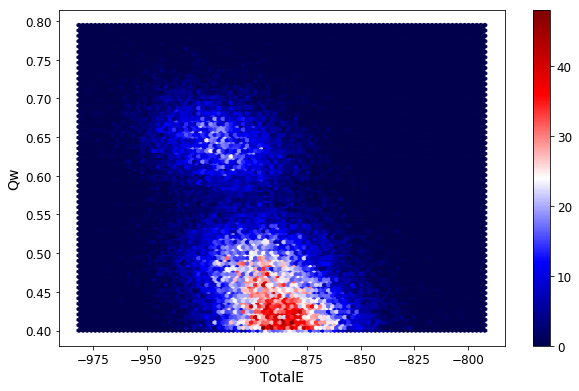

In [17]:
rerun1.query("Temp == 300 and Qw > 0.4").plot.hexbin("TotalE", "Qw", cmap="seismic", sharex=False)